In [12]:
import pandas as pd
melbourne_file_path = 'D:\Personal\Archana\MLLearning\melb_data\melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [13]:
melbourne_data = melbourne_data.dropna(axis=0)

In [14]:
y = melbourne_data.Price

In [15]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

In [16]:
X = melbourne_data[melbourne_features]

In [17]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [19]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [20]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

1115.7467183128902

In [21]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

274820.6804389929


In [ ]:
Wow!
Your mean absolute error for the in-sample data was about 500 dollars. Out-of-sample it is more than 250,000 dollars.

This is the difference between a model that is almost exactly right, and one that is unusable for most practical purposes. As a point of reference, the average home value in the validation data is 1.1 million dollars. So the error in new data is about a quarter of the average home value.

There are many ways to improve this model, such as experimenting to find better features or different model types.

In [22]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [23]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


218482.25517538196


In [25]:
def get_randomforest_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [26]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_randomforest_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 5  		 Mean Absolute Error:  368474
Max leaf nodes: 50  		 Mean Absolute Error:  255054
Max leaf nodes: 500  		 Mean Absolute Error:  214916


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Max leaf nodes: 5000  		 Mean Absolute Error:  215673


In [27]:
forest_model = RandomForestRegressor(max_leaf_nodes=500,random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


215998.21107438442


In [28]:
import pandas as pd
reviews = pd.read_csv("D:\Personal\Archana\MLLearning\melb_data\melb_data.csv", index_col='Date', parse_dates=True)
reviews.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-03-12,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2016-04-02,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2017-04-03,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Date')

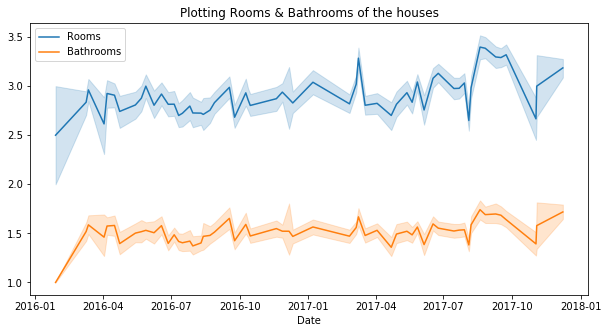

In [30]:
plt.figure(figsize=(10,5))

plt.title("Plotting Rooms & Bathrooms of the houses")
#sns.lineplot(data=reviews['Price'] , label='Price')
#sns.lineplot(data=reviews['Landsize'] , label='Landsize')
sns.lineplot(data=reviews['Rooms'] , label='Rooms')
sns.lineplot(data=reviews['Bathroom'] , label='Bathrooms')
plt.xlabel("Date")



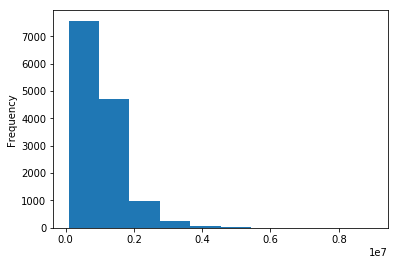

In [24]:
reviews['Price'].plot.hist()

In [ ]:
reviews.head()


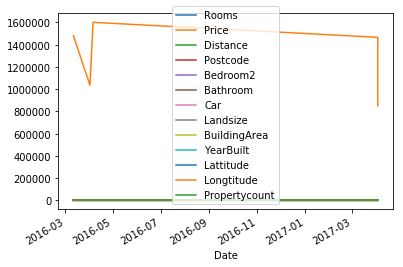

In [31]:
reviews.head().plot.line()

In [32]:
print(val_y)
print(melb_preds)

4850      815000.0
2307      655000.0
10090     957500.0
3645     1330000.0
4930      722000.0
3649      551000.0
5473      945000.0
1682     2400000.0
11114    1200000.0
439       850000.0
11493     710000.0
3900     1782500.0
4962      910000.0
6242     1650000.0
1032      765000.0
7714      577000.0
5024      875000.0
2575     1600000.0
6515     1010000.0
453       950000.0
1959     1000000.0
7928     2500000.0
1643     2200000.0
1361      820000.0
10652    1300000.0
11402     705000.0
4636      790000.0
10261     886000.0
8889     1205000.0
5208      340000.0
           ...    
6716     1520000.0
2463     1500000.0
2723      740000.0
7532     1292000.0
141       520000.0
8820      500000.0
1995      451000.0
9463      755000.0
382      1710000.0
5926      950000.0
3746      349000.0
3964      570000.0
3541     1234500.0
2496      846000.0
8370      485000.0
7688      835000.0
6559      380000.0
3345     1210000.0
1404      810000.0
10664    1398000.0
6701      767000.0
3361      89

Text(0.5, 0, 'House Prices')

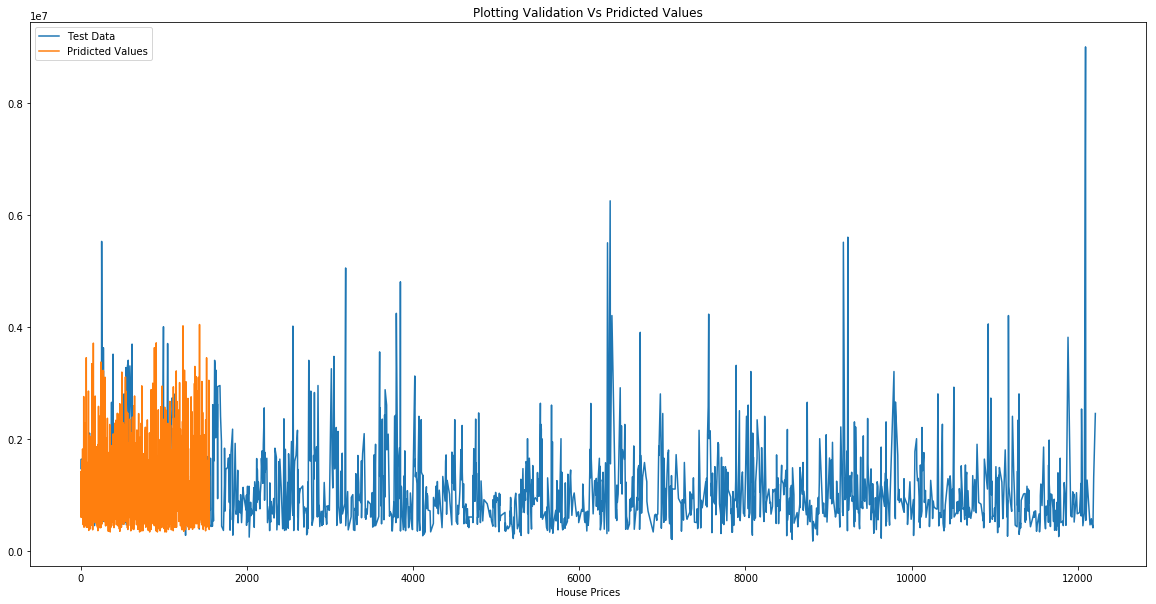

In [34]:
plt.figure(figsize=(20,10))

plt.title("Plotting Validation Vs Pridicted Values")
#sns.lineplot(data=reviews['Price'] , label='Price')
#sns.lineplot(data=reviews['Landsize'] , label='Landsize')
sns.lineplot(data=val_y , label='Test Data')
sns.lineplot(data=melb_preds , label='Pridicted Values')

#sns.lineplot(data=reviews['Bathroom'] , label='Bathrooms')
plt.xlabel("House Prices")

Text(0, 0.5, 'Arrival delay (in minutes)')

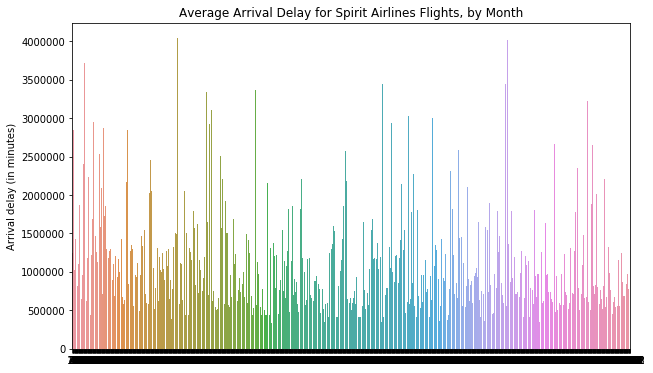

In [36]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=val_y.index, y=melb_preds)

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Text(0.5, 42.0, 'Date')

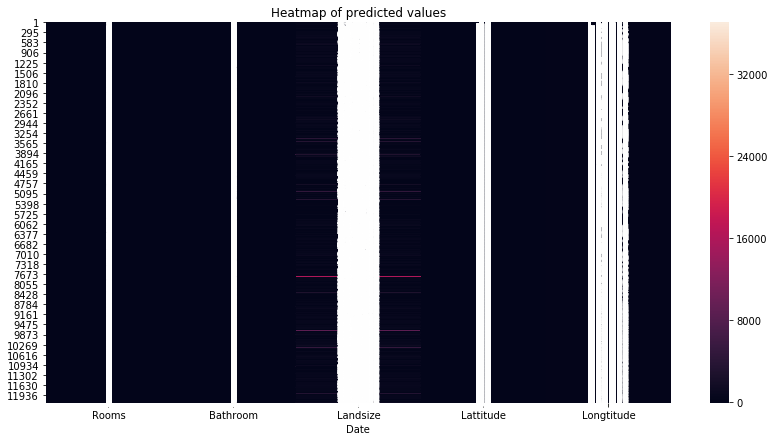

In [41]:
# Set the width and height of the figure
plt.figure(figsize=(14,7))

# Add title
plt.title("Heatmap of predicted values")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=X, annot=True)

# Add label for horizontal axis
plt.xlabel("Date")

In [46]:

    
cancer_file_path = 'D:\Personal\Archana\MLLearning\cancer_b.csv'
cancer_data = pd.read_csv(cancer_file_path, index_col='Id') 
cancer_data.columns

Index(['Diagnosis', 'Radius (mean)', 'Texture (mean)', 'Perimeter (mean)',
       'Area (mean)', 'Smoothness (mean)', 'Compactness (mean)',
       'Concavity (mean)', 'Concave points (mean)', 'Symmetry (mean)',
       'Fractal dimension (mean)', 'Radius (se)', 'Texture (se)',
       'Perimeter (se)', 'Area (se)', 'Smoothness (se)', 'Compactness (se)',
       'Concavity (se)', 'Concave points (se)', 'Symmetry (se)',
       'Fractal dimension (se)', 'Radius (worst)', 'Texture (worst)',
       'Perimeter (worst)', 'Area (worst)', 'Smoothness (worst)',
       'Compactness (worst)', 'Concavity (worst)', 'Concave points (worst)',
       'Symmetry (worst)', 'Fractal dimension (worst)'],
      dtype='object')

In [47]:
cancer_data


,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.066640,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.239000,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.045680,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.189000,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.088670,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.025620,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.048330,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.015880,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.068800,0.02564,0.3105,0.07409
857155,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,...,13.760,20.70,89.88,582.6,0.14940,0.21560,0.305000,0.06548,0.2747,0.08301
857156,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,0.1809,...,15.150,31.82,99.00,698.8,0.11620,0.17110,0.228200,0.12820,0.2871,0.06917
857343,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.016570,0.011150,0.1495,...,12.980,25.72,82.98,516.5,0.10850,0.08615,0.055230,0.03715,0.2433,0.06563
857373,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,...,14.670,23.19,96.08,656.7,0.10890,0.15820,0.105000,0.08586,0.2346,0.08025


Text(0.5, 0, 'Mean')

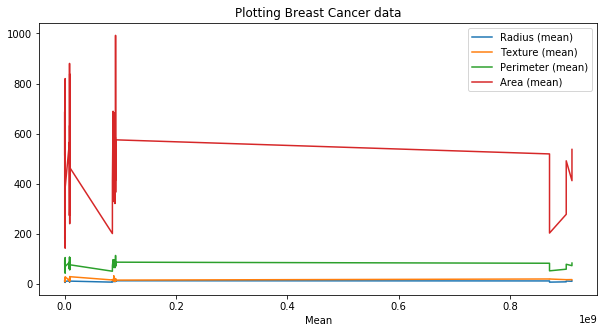

In [48]:
plt.figure(figsize=(10,5))

plt.title("Plotting Breast Cancer data")
#sns.lineplot(data=reviews['Price'] , label='Price')
#sns.lineplot(data=reviews['Landsize'] , label='Landsize')
sns.lineplot(data=cancer_data['Radius (mean)'], label='Radius (mean)')
sns.lineplot(data=cancer_data['Texture (mean)'], label='Texture (mean)')
sns.lineplot(data=cancer_data['Perimeter (mean)'], label='Perimeter (mean)')
sns.lineplot(data=cancer_data['Area (mean)'], label='Area (mean)')
#sns.lineplot(data=reviews['Bathroom'] , label='Bathrooms')
plt.xlabel("Mean")
